In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import nltk
from wordcloud import WordCloud

In [2]:
# Importing more libraries
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string
from nltk.stem import PorterStemmer

In [3]:
data = pd.read_csv('data/Elon_musk.csv')
data.head(10)

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


In [4]:
df = data.iloc[:,1:]
df.head()

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [5]:
df.loc[0]

Text    @kunalb11 I�m an alien
Name: 0, dtype: object

# Data Cleaning

In [6]:
# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

# Clean The Text
df["Text"] = df["Text"].apply(cleantext)

df.head()

,Text
0,I�m an alien
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...


In [7]:
stopwords_english =  stopwords.words('english')

emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

In [8]:
stemmer = PorterStemmer()

def remove_stopwords(tweet):
    tweets_clean = []
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)    
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
    
    list_to_str = ' '.join([str(ele) for ele in tweets_clean])
    return list_to_str

In [9]:
df['Text'] = df['Text'].apply(remove_stopwords)
df.head()

,Text
0,� alien
1,_aa_carmack ray trace cyberpunk hdr next-level...
2,great interview
3,doge underestim
4,congratul tesla china amaz execut last year ne...


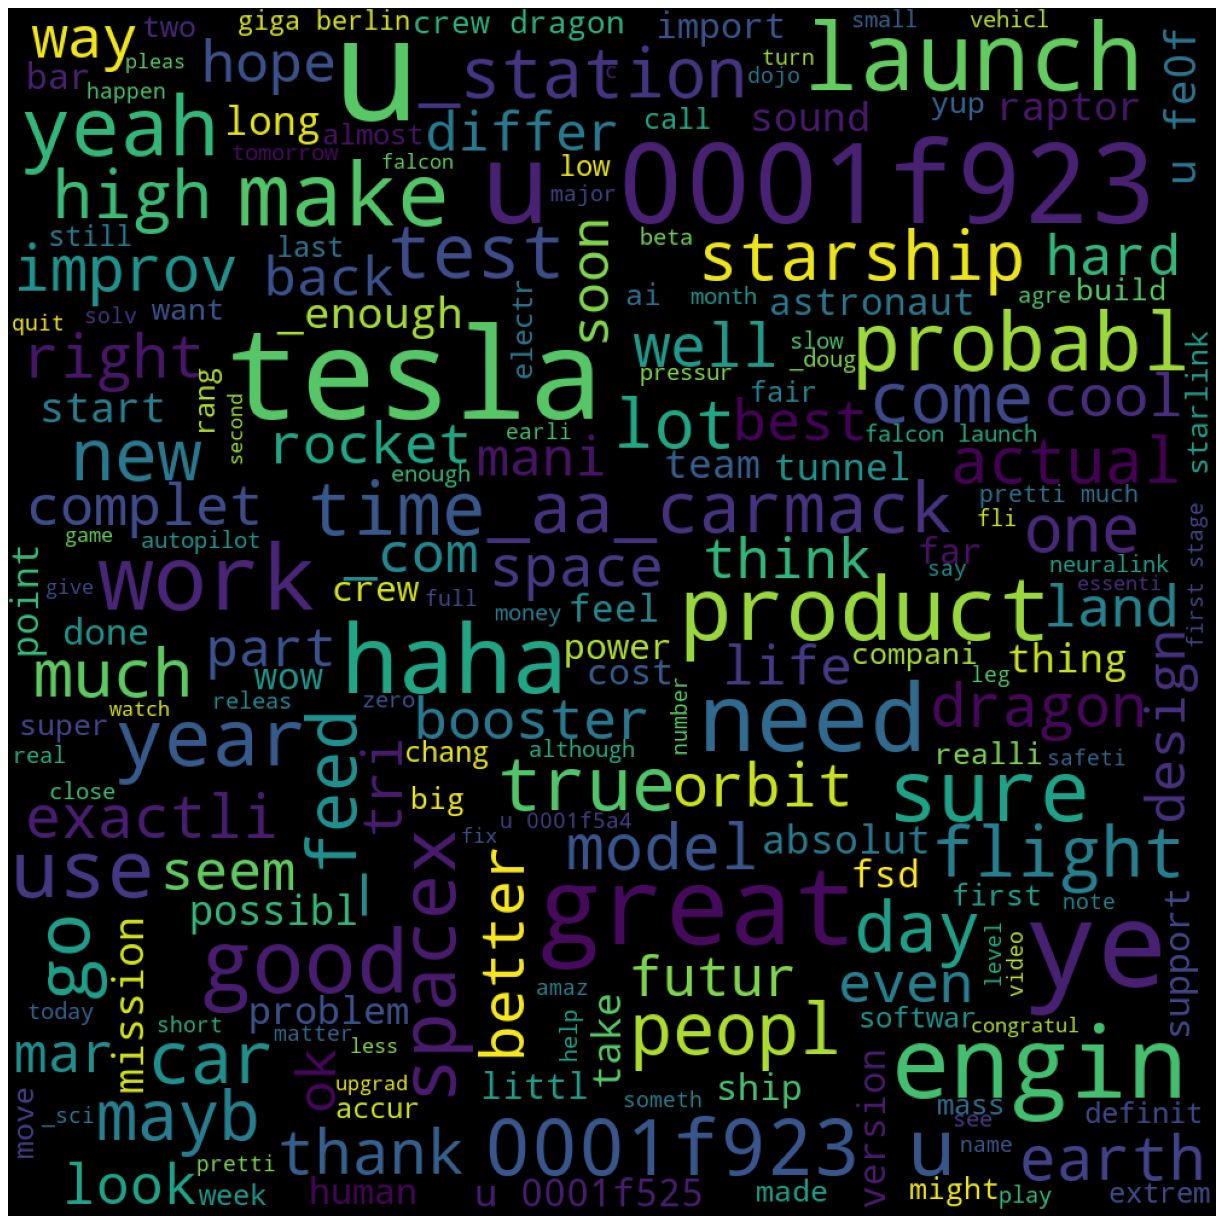

In [10]:
# Generating a wordcloud
allwords = " ".join([txt for txt in df["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

# Using vader_lexicon for sentiment analysis

In [11]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Harshpreet
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
sia = SentimentIntensityAnalyzer()
a = "I'm an alien"
sia.polarity_scores(a)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [13]:
def get_vader_sentiment(review): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text 
    analysis = sia.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [14]:
df["analysis"] = df["Text"].apply(get_vader_sentiment)
df.head(10)

,Text,analysis
0,� alien,neutral
1,_aa_carmack ray trace cyberpunk hdr next-level...,neutral
2,great interview,positive
3,doge underestim,neutral
4,congratul tesla china amaz execut last year ne...,neutral
5,happi new year ox,neutral
6,frodo underdog thought would fail,negative
7,haha thank,positive
8,inde tweet definit repres real-world time alloc,neutral
9,entertain outcom like,positive


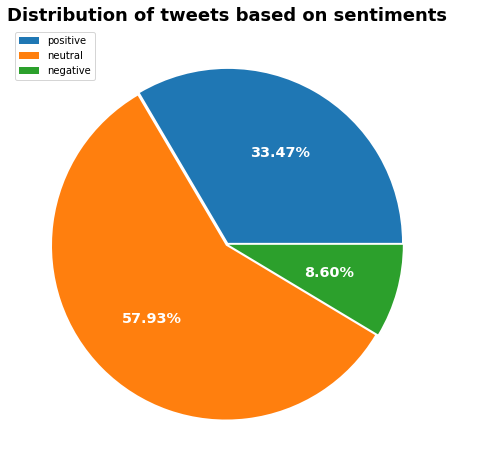

In [15]:
plt.figure(figsize = (10, 8))
twt_count = df[df['analysis'] == 'positive'].count().to_list()[0] , df[df['analysis'] == 'neutral'].count().to_list()[0] , df[df['analysis'] == 'negative'].count().to_list()[0]
plt.pie(twt_count, 
        labels = ['positive', 'neutral', 'negative'],
        autopct = '%.2f%%',
        explode=[0.01]*3, 
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '0',
                     'color' : 'w'})
plt.legend()
plt.title('Distribution of tweets based on sentiments', fontsize = 18, fontweight = 'bold')
plt.show()

# Taking compound scores

In [17]:
sia.polarity_scores(df.loc[2]['Text'])['compound']

0.6249

In [18]:
def get_compound_scores(tweet):
    return sia.polarity_scores(tweet)['compound']

In [19]:
df['score'] = df['Text'].apply(get_compound_scores)
df.head()

,Text,analysis,score
0,� alien,neutral,0.0000
1,_aa_carmack ray trace cyberpunk hdr next-level...,neutral,0.0000
2,great interview,positive,0.6249
3,doge underestim,neutral,0.0000
4,congratul tesla china amaz execut last year ne...,neutral,0.0000


In [27]:
# Top 10 positive tweets
df_sort = df.sort_values(by = 'score' , ascending= False)
df_sort.head(10)

,Text,analysis,score
1388,wow super love astronomi took queen penn defin...,positive,0.9169
1184,falcon 9 launch � super cool interstellar map ...,positive,0.8957
1357,great trip germani support govern peopl super ...,positive,0.8934
1172,thank tesla team great work deliveri new owner...,positive,0.8885
859,thank great autopilot ai team work super hard ...,positive,0.8779
108,feel weird help make hope good version cyberpu...,positive,0.8625
1953,well care much sustain civil truth ironi part ...,positive,0.8625
468,_john � good great game imo improv may seem li...,positive,0.8591
350,leg would certainli work best part part best s...,positive,0.8555
543,thank everyth help build spacex best memori ever,positive,0.8555


Text(0, 0.5, 'Score')

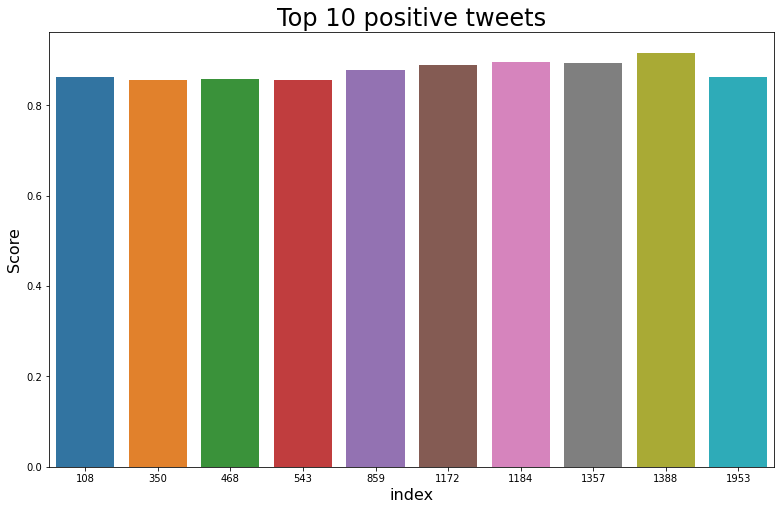

In [21]:
plt.figure(figsize= (13,8))
sns.barplot(x = df_sort.index[0:10] , y = df_sort.score[0:10])
plt.title('Top 10 positive tweets' , fontsize = 24)
plt.xlabel('index', fontsize = 16)
plt.ylabel('Score', fontsize = 16)

In [22]:
df.loc[1388]['Text']

'wow super love astronomi took queen penn definit one favorit class �'

Text(0, 0.5, 'Score')

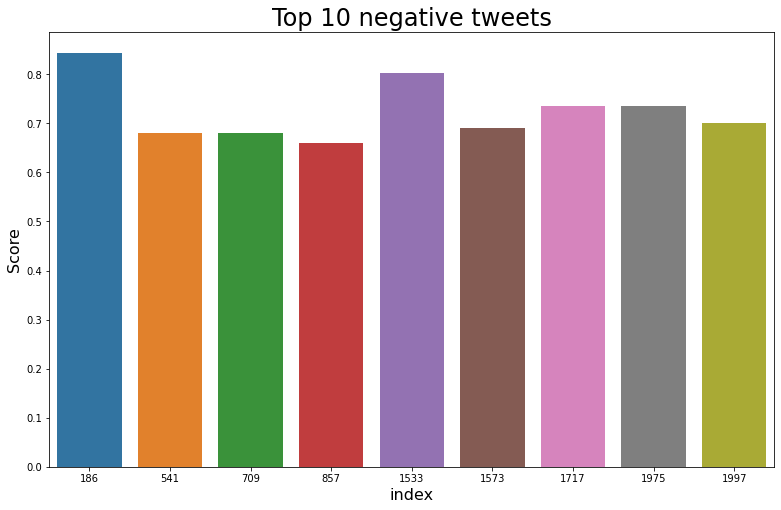

In [23]:
plt.figure(figsize= (13,8))
sns.barplot(x = df_sort.index[:-10:-1] , y = abs(df_sort.score[:-10:-1]))
plt.title('Top 10 negative tweets' , fontsize = 24)
plt.xlabel('index', fontsize = 16)
plt.ylabel('Score', fontsize = 16)

In [24]:
df.loc[186]['Text']

'tyranni also road hell mostli pave bad intent'

# Top positive words

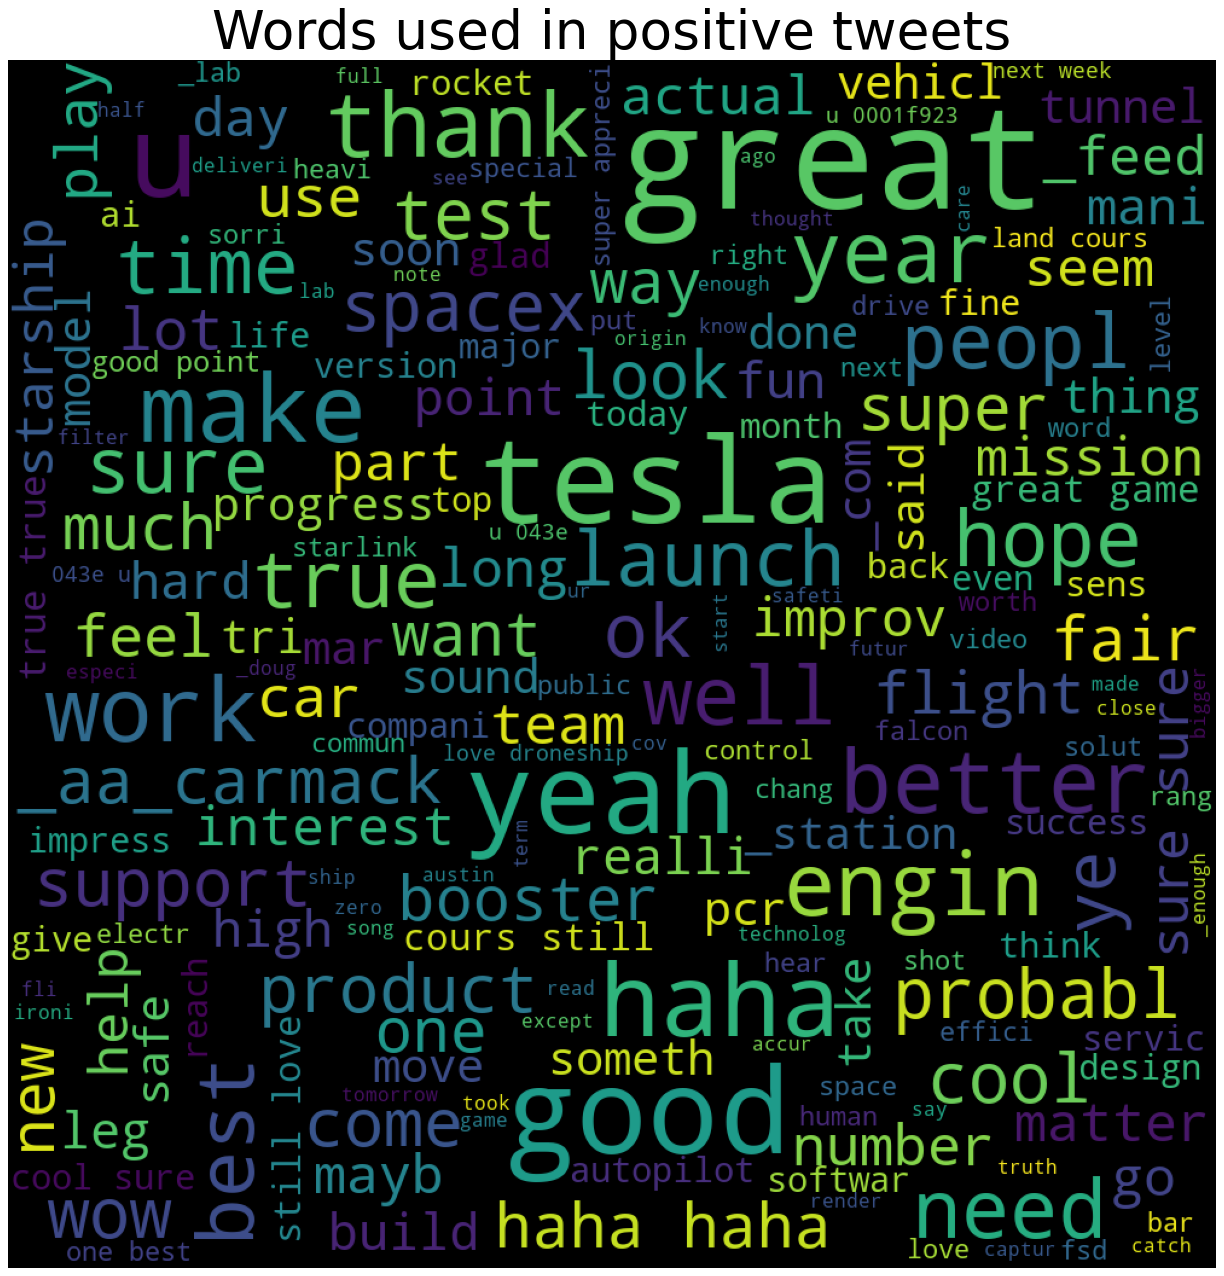

In [25]:
# Generating a wordcloud
allwords = " ".join([txt for txt in df_sort[df_sort['score'] > 0]['Text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.title('Words used in positive tweets' , fontsize = 48)
plt.show()

# Top negative words

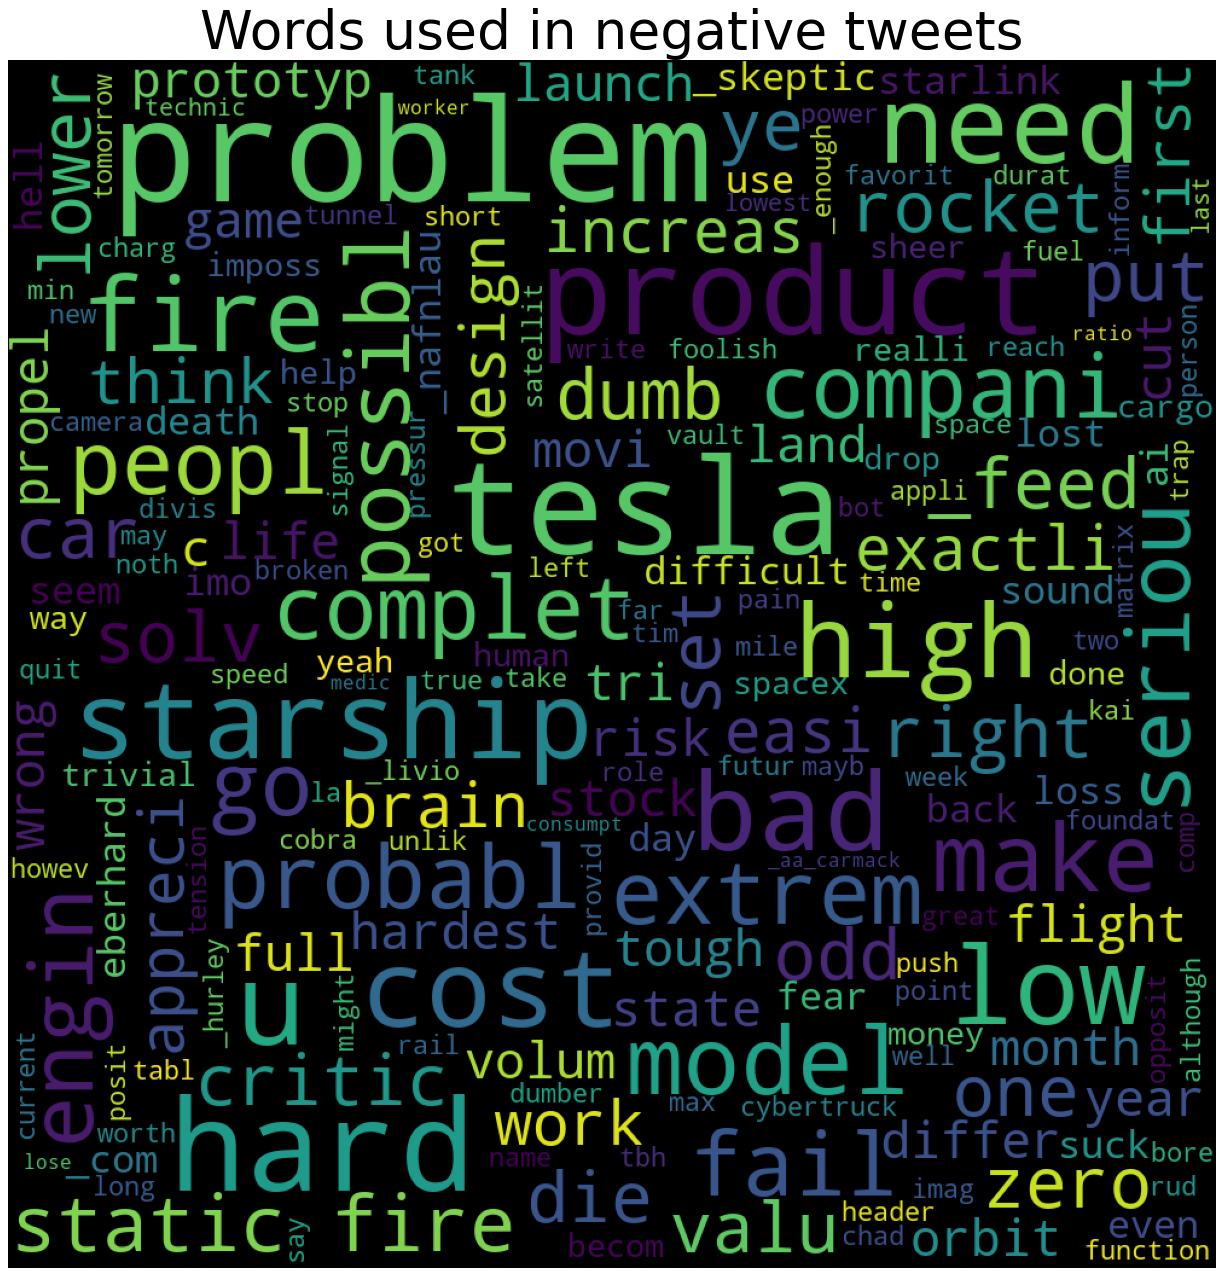

In [26]:
# Generating a wordcloud
allwords = " ".join([txt for txt in df_sort[df_sort['score'] < 0]['Text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.title('Words used in negative tweets' , fontsize = 48)
plt.show()